In [20]:
from pydoc import describe
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

wine =  pd.read_csv("wine.csv")
wine

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class Label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,NaN,5.64,1.04,NaN,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [21]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               177 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  177 non-null    float64
 12  Proline                       178 non-null    int64  
 13  Class

In [22]:
print(wine["Proanthocyanins"]) # proanthocyanidins are a class of polyphenols found in many plants, such as cranberry, blueberry, and grape seeds
print(wine["OD280/OD315 of diluted wines"]) # this is a method for determining the protein concentration, 
                                            # which can determine the protein content of various wines

0       NaN
1      1.28
2      2.81
3      2.18
4      1.82
       ... 
173    1.06
174    1.41
175    1.35
176    1.46
177    1.35
Name: Proanthocyanins, Length: 178, dtype: float64
0       NaN
1      3.40
2      3.17
3      3.45
4      2.93
       ... 
173    1.74
174    1.56
175    1.56
176    1.62
177    1.60
Name: OD280/OD315 of diluted wines, Length: 178, dtype: float64


In [23]:
wine["Proanthocyanins"] = wine["Proanthocyanins"].fillna(wine["Proanthocyanins"].mean())
wine.info()

wine["OD280/OD315 of diluted wines"] = wine["OD280/OD315 of diluted wines"].fillna(wine["OD280/OD315 of diluted wines"].mean())
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  177 non-null    float64
 12  Proline                       178 non-null    int64  
 13  Class

In [24]:
wine.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class Label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.586949,5.058090,0.957472,2.604294,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.569928,2.318286,0.228567,0.703108,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Median of Alcohol: 13.05
Mean of Alcohol: 13.00061797752809 

Median of Malic acid: 1.8650000000000002
Mean of Malic acid: 2.3363483146067416 

Median of Ash: 2.36
Mean of Ash: 2.3665168539325845 

Median of Alcalinity of ash: 19.5
Mean of Alcalinity of ash: 19.49494382022472 

Median of Magnesium: 98.0
Mean of Magnesium: 99.74157303370787 

Median of Total phenols: 2.355
Mean of Total phenols: 2.295112359550562 

Median of Flavanoids: 2.135
Mean of Flavanoids: 2.0292696629213487 

Median of Nonflavanoid phenols: 0.34
Mean of Nonflavanoid phenols: 0.3618539325842696 

Median of Proanthocyanins: 1.5550000000000002
Mean of Proanthocyanins: 1.586949152542373 

Median of Color intensity: 4.6899999999999995
Mean of Color intensity: 5.058089887640449 

Median of Hue: 0.965
Mean of Hue: 0.9574719101123595 

Median of OD280/OD315 of diluted wines: 2.78
Mean of OD280/OD315 of diluted wines: 2.6042937853107344 

Median of Proline: 673.5
Mean of Proline: 746.8932584269663 

Median of Class Label:

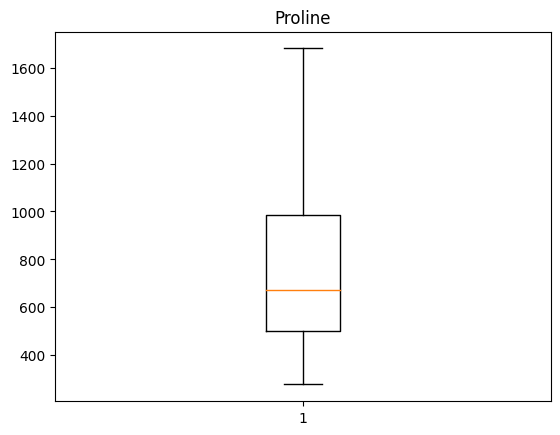

In [25]:
# compare mean() and median()

for name in wine.columns:
    print(f"Median of {name}:", wine[name].median())
    print(f"Mean of {name}:", wine[name].mean(), "\n")

plt.boxplot(wine["Proline"])
plt.title("Proline")
plt.show()

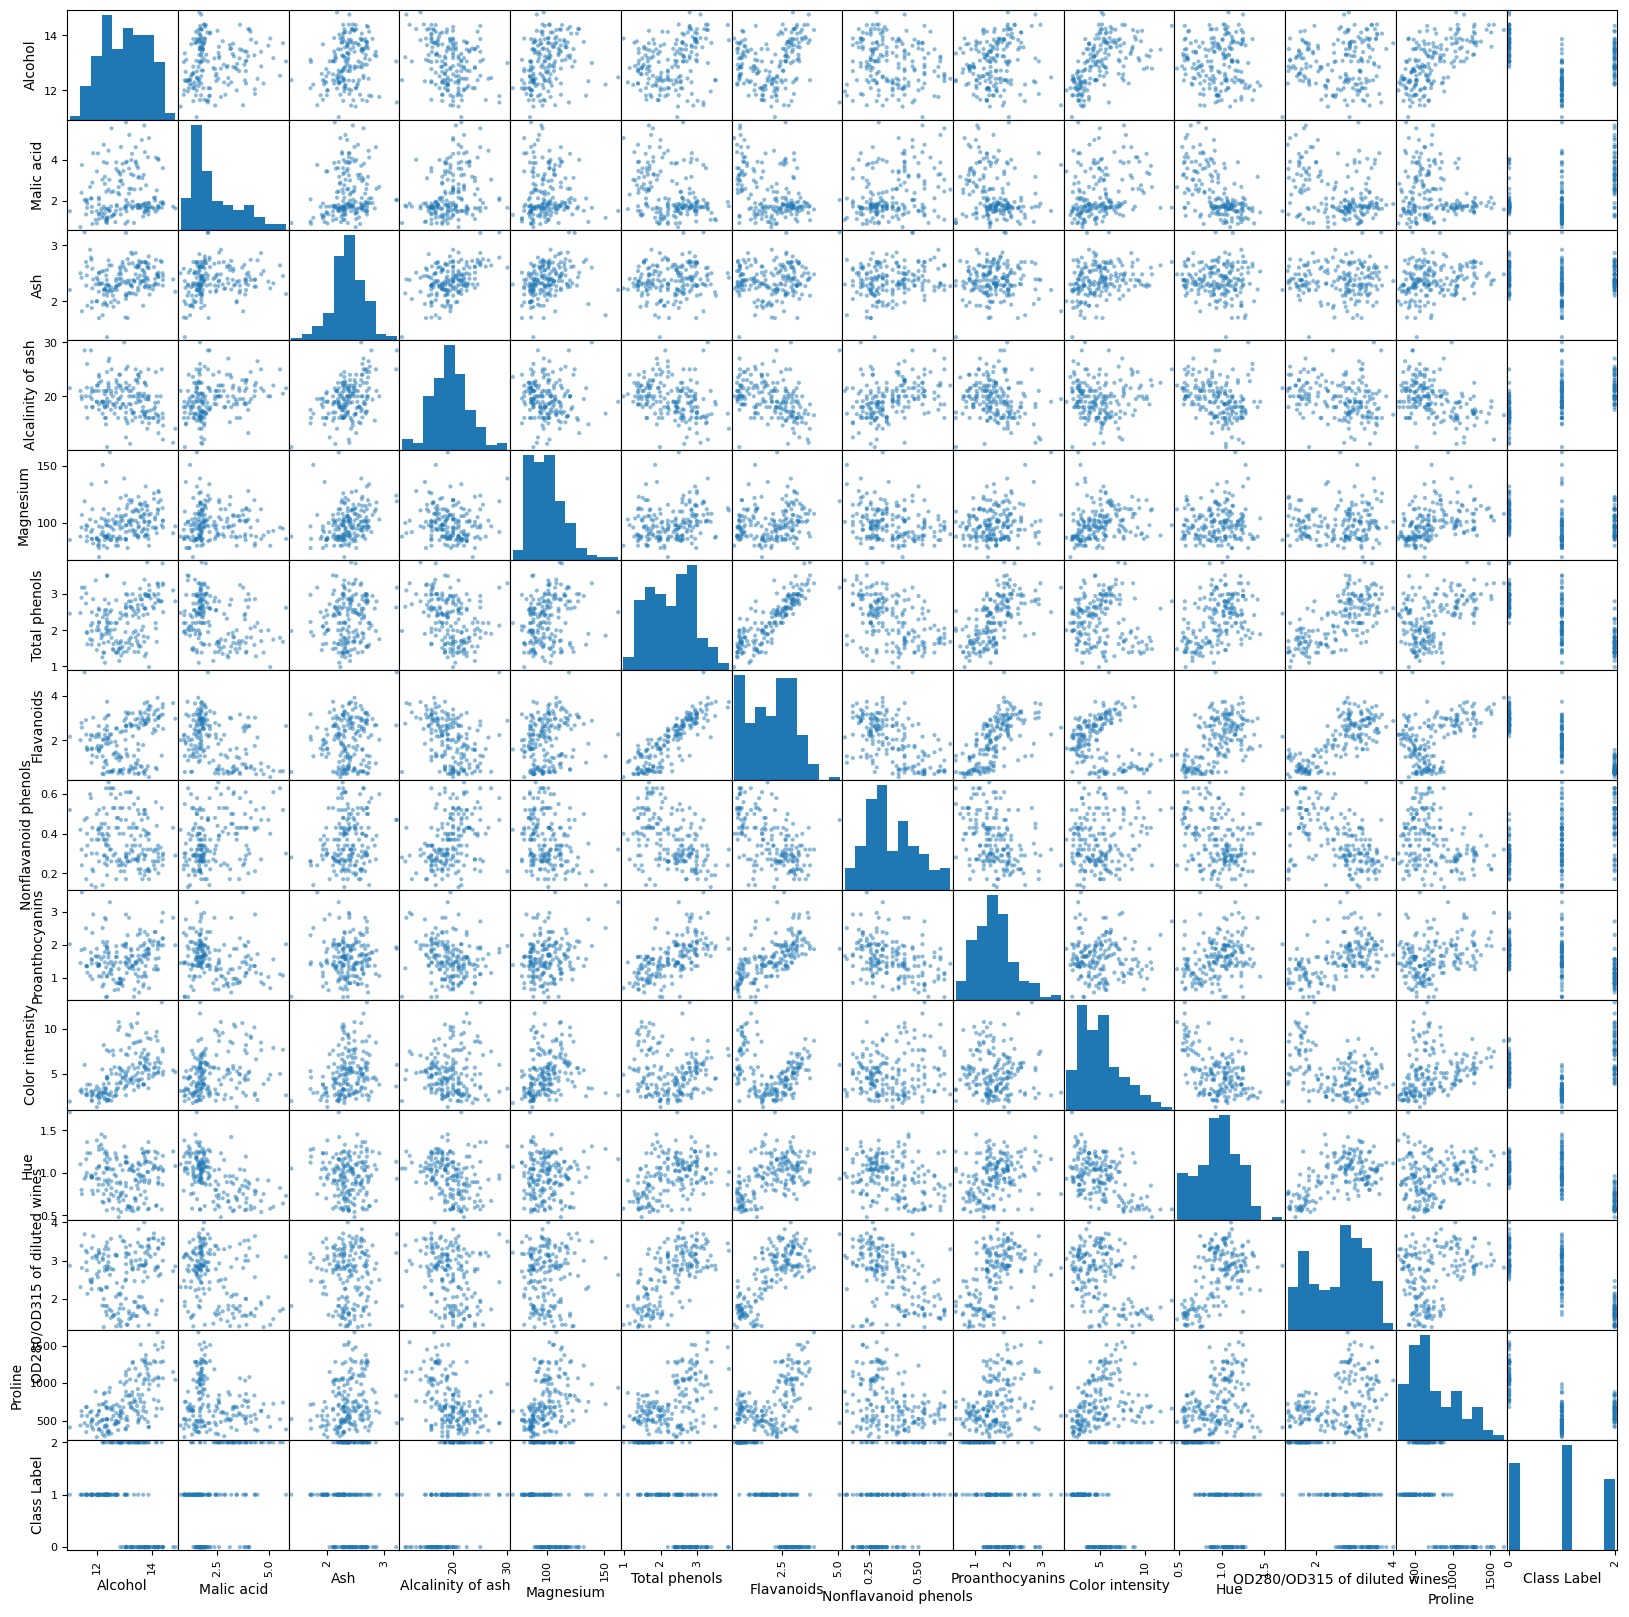

In [26]:
scatter_matrix(wine, figsize=(20,20))
plt.show()

# wine = wine.drop("Class Label", axis=1)
# wine.info()

# scatter_matrix(wine, figsize=(20,20))
# plt.show()

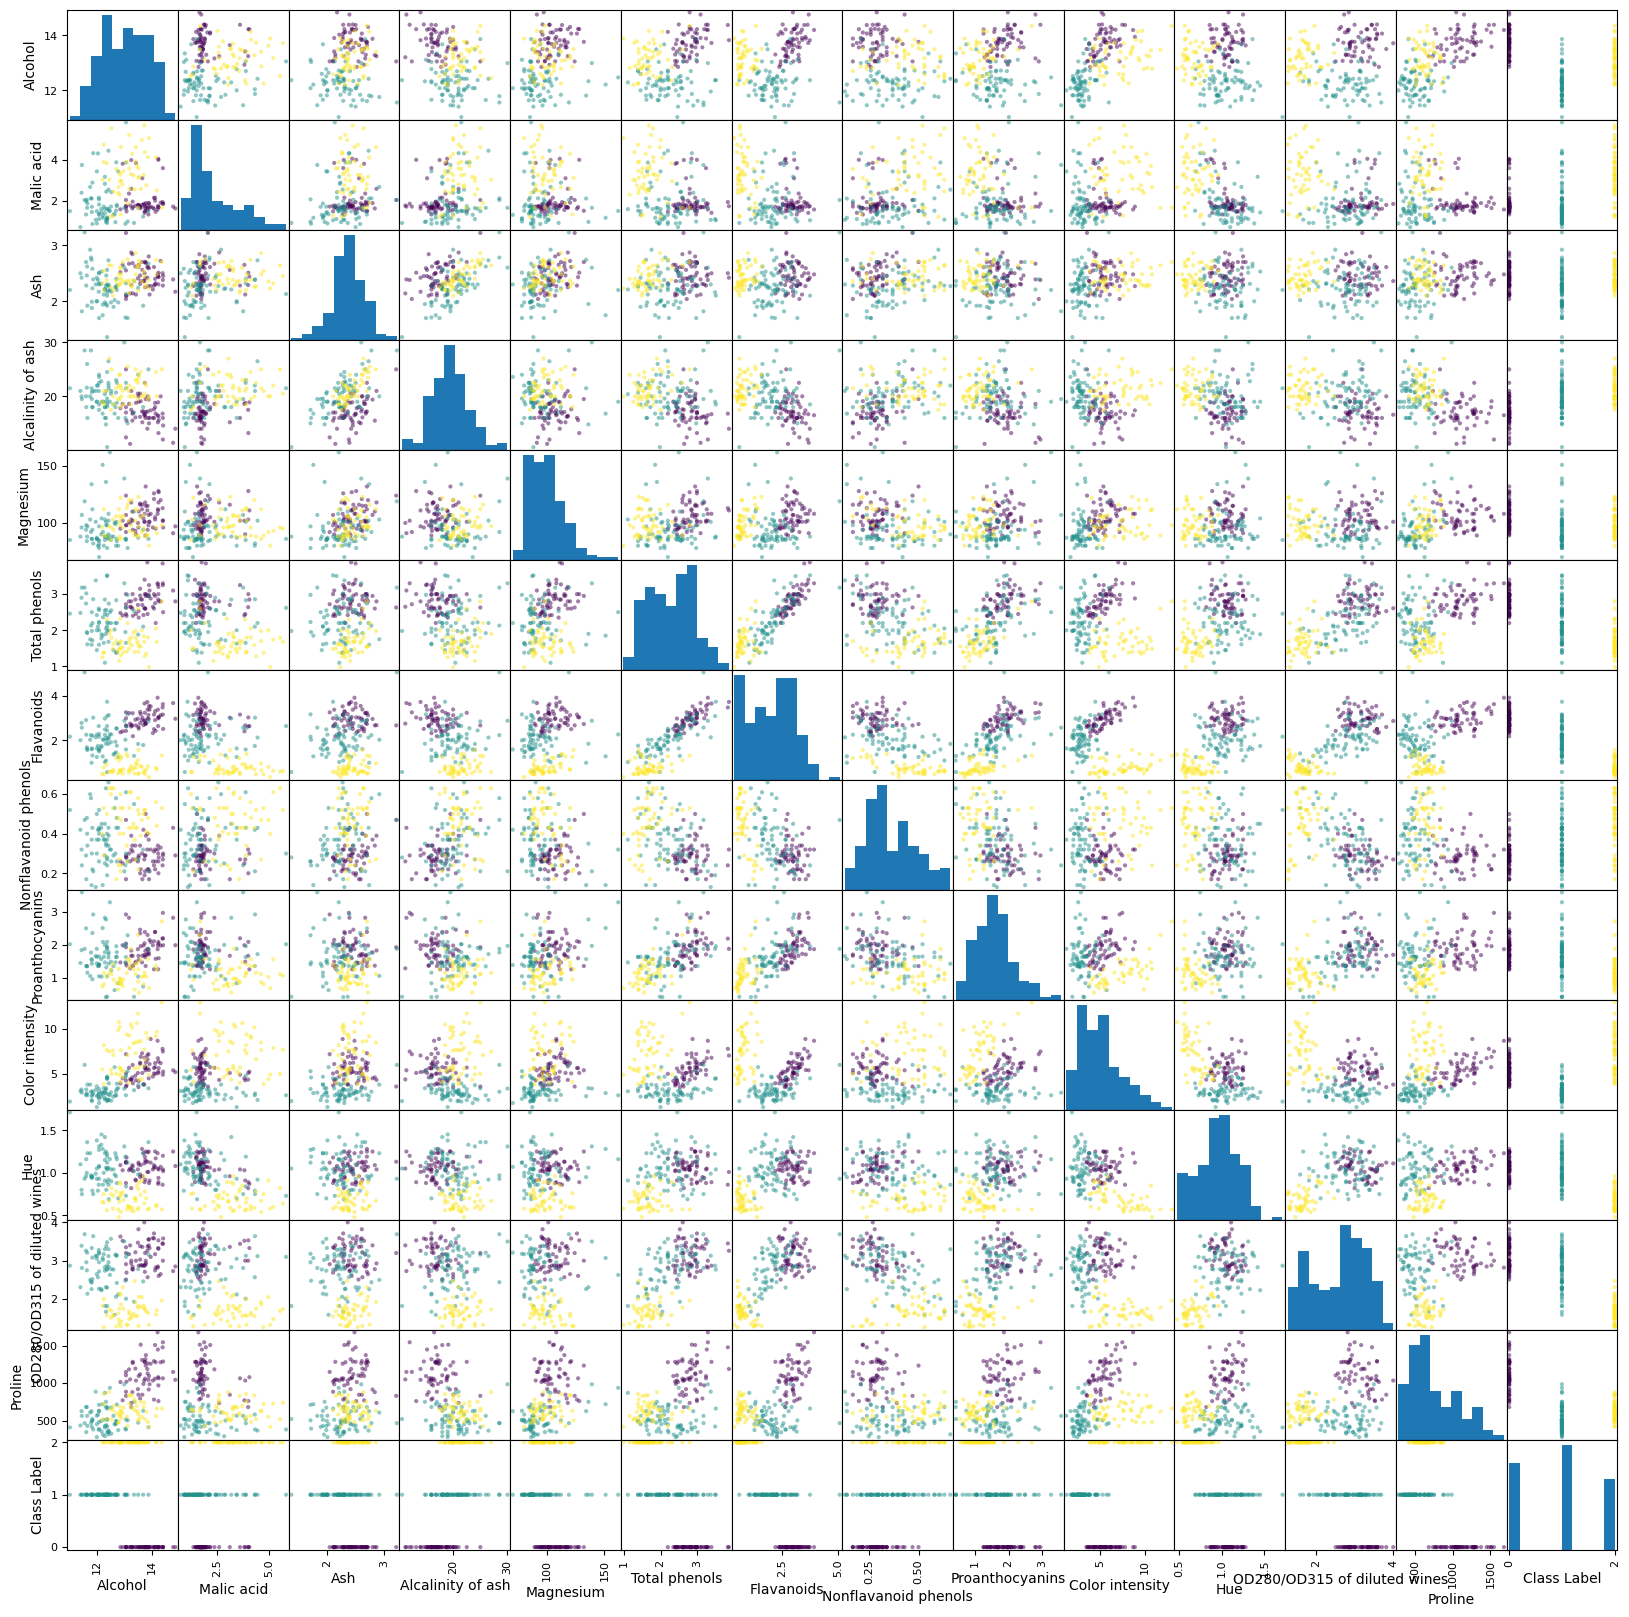

In [27]:
scatter_matrix(wine, c = wine["Class Label"], figsize=(20,20))
plt.show()

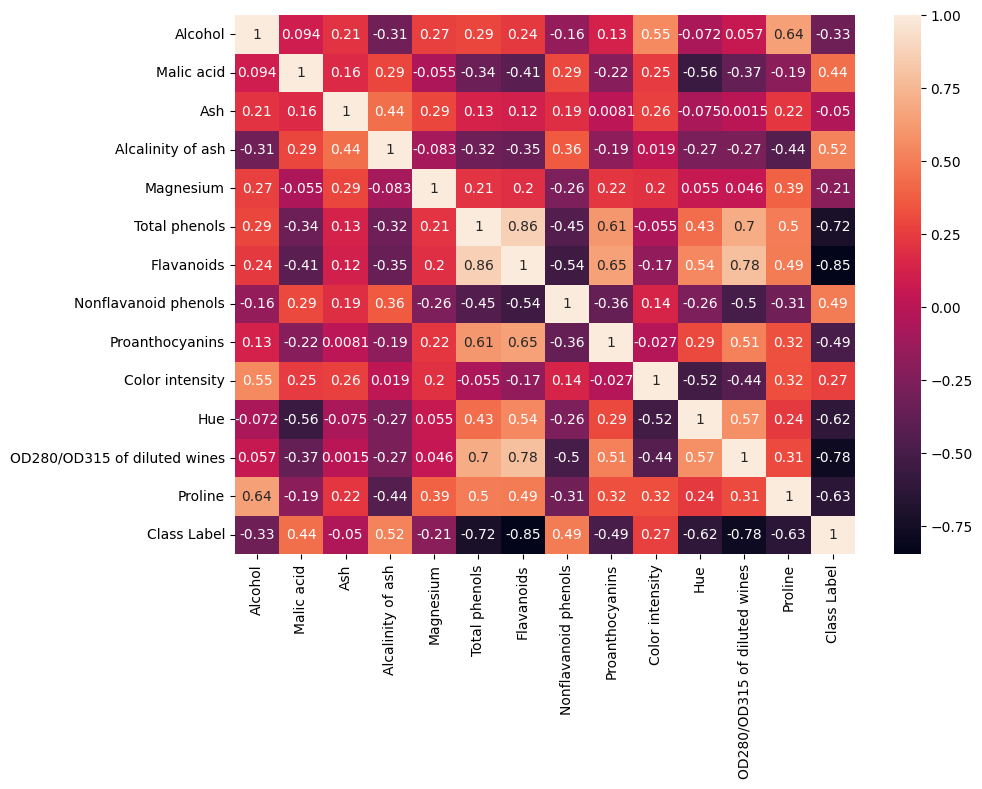

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(wine.corr(), annot=True)
plt.show()

In [29]:
# x = wine.drop("Color intensity", axis=1).to_numpy()
# y = wine[["Color intensity"]].to_numpy()

scaler = MinMaxScaler()
x = wine.drop("Color intensity", axis=1).to_numpy()
x = scaler.fit_transform(x)
y = wine[["Color intensity"]].to_numpy()
y = scaler.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

In [30]:
model = LinearRegression().fit(x_train, y_train)

yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)

print(f"Train R^2: {model.score(x_train, y_train)}")
print(f"Test R^2: {model.score(x_test, y_test)}")

print("\n", model.intercept_) #b0
print(model.coef_)

Train R^2: 0.7166101032514312
Test R^2: 0.6661783319025787

 [-0.15167554]
[[ 0.37559481 -0.06640621  0.10961624 -0.15575084 -0.02899158  0.00147715
   0.34696076  0.07187503  0.04010469 -0.37812254 -0.09204083  0.4251022
   0.43847432]]


In [31]:
from xgboost import XGBRegressor

model = XGBRegressor().fit(x_train, y_train)

yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)

print(f"Train R^2: {model.score(x_train, y_train)}")
print(f"Test R^2: {model.score(x_test, y_test)}")

Train R^2: 0.9999924259866223
Test R^2: 0.6802522235362143
